# (Prosper Loan Dataset Exploration)
## by (Ujwala K)

# Table OF Contents

## [1.Univariate Exploration](#uni)

## [2.Bivariate Exploration](#bi)

## [3.Multivariate Exploration](#multi)



## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


### Mainly my focus will be to answer below questions:- 

>1)Factors responsible for loan status outcome such as completed or cancelled or past-due etc

>2)Factors affecting borrower's APR(which usually includes broker fees, closing costs, rebates, and discount points)

>3)Factors affecting borrower's interest rate

>4)Large loan amount differentiation factors(Are there differences between loans depending on how large the original loan amount was?)


In [31]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading and exploring basic characteristics of dataset

In [32]:
df = pd.read_csv('prosperLoanData.csv')

In [33]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [35]:
df.LoanStatus.describe()

count      113937
unique         12
top       Current
freq        56576
Name: LoanStatus, dtype: object

In [36]:
df.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

### What is the structure of your dataset?

> The dataset has 113937 rows and 81 columns

### What is/are the main feature(s) of interest in your dataset?

> Mainly i will be intrested in loan outcome and APR deciding factors for the borrower

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think borrower's income debt data will be the most important and starting point of investigation for me and in general as well for any bank or credit institution, they are more intrested in borrower's income debt, credit data mainly.In addition. prosper ratings an dscore and loan amounts may also be the deciding factors

Hence i will be visualizing and analysing following fields mainly:-

1)LoanStatus	The current status of the loan: Cancelled,  Chargedoff, etc

2)BorrowerAPR	The Borrower's Annual Percentage Rate (APR) for the loan.																								
3)ProsperRating (Alpha)	The Prosper Rating assigned at the time the listing was created between AA - HR.  							
4)ProsperScore	A custom risk score built using historical Prosper data.  																								
5)Occupation	The Occupation selected by the Borrower at the time they created the listing.																								
6)EmploymentStatus	The employment status of the borrower at the time they posted the listing.																								
7)DebtToIncomeRatio	The debt to income ratio of the borrower at the time the credit profile was pulled

8)IncomeRange	The income range of the borrower at the time the listing was created.																								
9)StatedMonthlyIncome	The monthly income the borrower stated at the time the listing was created.																								
10)LoanOriginalAmount	The origination amount of the loan.																								
11)CreditGrade	The Credit rating that was assigned at the time the listing went live. 																
12)BorrowerRate	The Borrower's interest rate for this loan. 																								
13)EstimatedLoss	Estimated loss is the estimated principal loss on charge-offs.  

14)EstimatedReturn	The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. 						

## Univariate Exploration <a class="anchor" id="uni"></a>

> Mainly i am starting analysis by plotting  Borrower APR , interest rate and loan staus plots

In [112]:
# Convert EmploymentStatus and IncomeRange to ordered categorical data type
var_dict = {'EmploymentStatus': ['Employed','Full-time','Self-employed','Not available','Other','Part-time','Not employed','Retired'],
            'IncomeRange': ['$25,000-49,999','$50,000-74,999','$100,000+','$75,000-99,999','Not displayed','$1-24,999','Not employed','$0'],
            'LoanStatus': ['Current','Completed','Chargedoff','Defaulted','Past Due (1-15 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','FinalPaymentInProgress','Past Due (>120 days)','Cancelled']
           }

for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   ListingKey                           113937 non-null  object  
 1   ListingNumber                        113937 non-null  int64   
 2   ListingCreationDate                  113937 non-null  object  
 3   CreditGrade                          28953 non-null   object  
 4   Term                                 113937 non-null  int64   
 5   LoanStatus                           113937 non-null  category
 6   ClosedDate                           55089 non-null   object  
 7   BorrowerAPR                          113912 non-null  float64 
 8   BorrowerRate                         113937 non-null  float64 
 9   LenderYield                          113937 non-null  float64 
 10  EstimatedEffectiveYield              84853 non-null   float64 
 11  

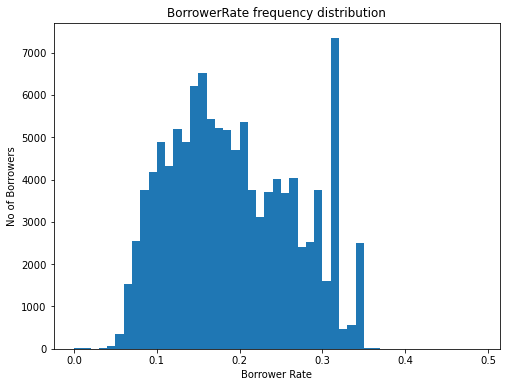

In [47]:
#check histagram for borrower intrest rate
#bins = np.arange(100, 20000, 300)
plt.figure(figsize=[8,6])
bins = np.arange(0,df['BorrowerRate'].value_counts().index.max(),0.01)
plt.hist(data = df, x = 'BorrowerRate', bins = bins);
plt.title('BorrowerRate frequency distribution');
plt.xlabel('Borrower Rate');
plt.ylabel('No of Borrowers');

It seems for the borrower's loan intrest has 2 peaks, one is at around 0.15 and another peak a little over 0.3, which is the highest peak.So most of the loan's borrowers have distributed at the intrest rate of 1.5% to 3.5%

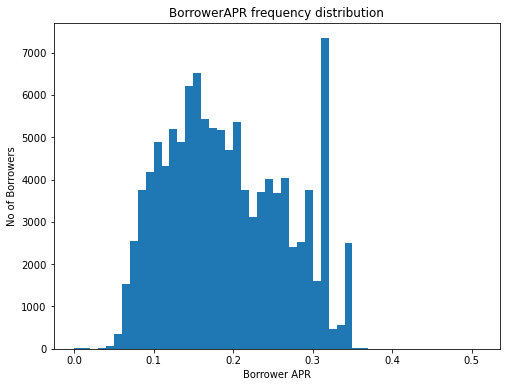

In [48]:
#check histagram for borrower APR 

plt.figure(figsize=[8,6])
bins = np.arange(0,df['BorrowerAPR'].value_counts().index.max(),0.01)
plt.hist(data = df, x = 'BorrowerRate', bins = bins);
plt.title('BorrowerAPR frequency distribution');
plt.xlabel('Borrower APR');
plt.ylabel('No of Borrowers');

The Borrower APR also has same distribution exactly like intrest rate.

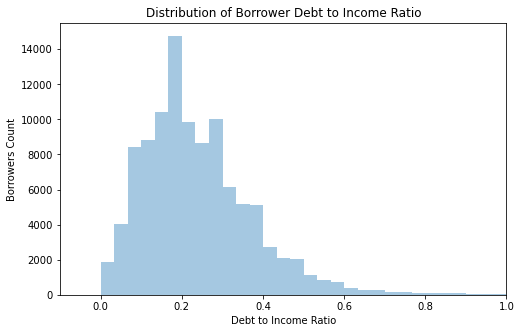

In [71]:
#check debtToincome ratio

# distribution plot
plt.figure(figsize = [8,5])
sb.distplot(df.DebtToIncomeRatio, kde = False, bins = 300)
plt.xlim(-.1, 1)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Borrowers Count')
plt.title('Distribution of Borrower Debt to Income Ratio');

As per investopedia:- A low debt-to-income ratio demonstrates a good balance between debt and income. In general, the lower the percentage, the better the chance you will be able to get the loan or line of credit you want.
Low debt-to-income ratio below 43% only will get loans in general

Here most of the borrower's seems to be having low DebtToIncome rate below 43% (means below 0.43), with a paeak at 0.2
Very few numbers above 45% needs investigation.

In [94]:
#check Occupation and Employment status 

df.Occupation.value_counts()   ,  df.Occupation.describe()  


(Other                          28617
 Professional                   13628
 Computer Programmer             4478
 Executive                       4311
 Teacher                         3759
                                ...  
 Dentist                           68
 Student - College Freshman        41
 Student - Community College       28
 Judge                             22
 Student - Technical School        16
 Name: Occupation, Length: 67, dtype: int64,
 count     110349
 unique        67
 top        Other
 freq       28617
 Name: Occupation, dtype: object)

/Users/UjwalaKale/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


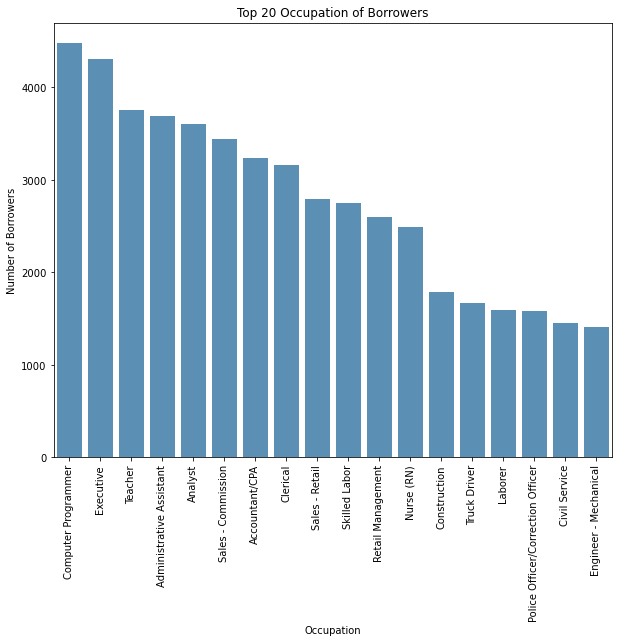

In [110]:
plt.figure(figsize=[10,8])

top20 = df.Occupation.value_counts()[2:20]
base_color = sb.color_palette()[0]
sb.barplot(top20.index, top20.values, alpha=0.8 , color=base_color)
plt.title('Top 20 Occupation of Borrowers')
plt.ylabel('Number of Borrowers')
plt.xlabel('Occupation')
plt.xticks(rotation =90)
plt.show()


Ignored the first 2 as Other and Professional , it seems People from IT industry mainly computer programmers are the highest borrowers of loan subsequently followed by executives and teachers and Aanalyst etc.
Intrestingly Federal or Govt jobs individuals Police-Officers and Civil services are not in top 10. 

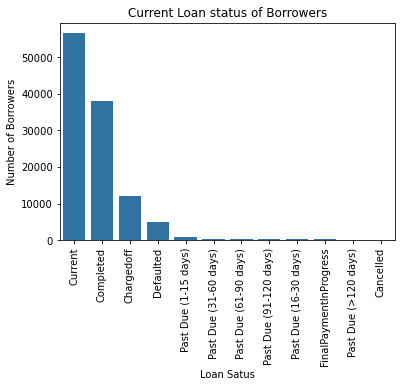

In [124]:
#check loan status 

sb.countplot(data=df, x='LoanStatus', color=base_color);
plt.title('Current Loan status of Borrowers')
plt.ylabel('Number of Borrowers')
plt.xlabel('Loan Satus')
plt.xticks(rotation=90)
plt.show()

It seems good to see very few applications are in hold means past due and cancelled state, current and completed applications other factors of borrowers need to be investigated and very importantly what kind of borrowers became defaulters or bank Chargedoff their loan will also need to be analysed.

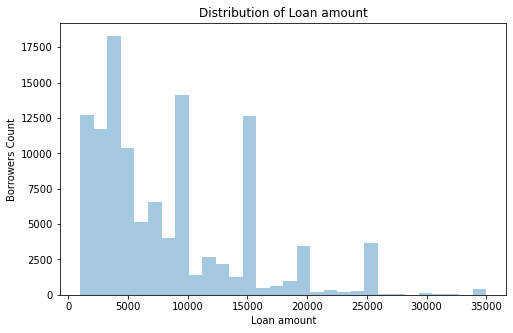

In [131]:
#check original loan amount distribution

plt.figure(figsize = [8,5])
sb.distplot(df.LoanOriginalAmount, kde = False, bins = 30)
plt.xlabel('Loan amount')
plt.ylabel('Borrowers Count')
plt.title('Distribution of Loan amount');

>Distribution of loan amount shows that the larger the Loan amount , less Borrowers Count and most of the loan amount distribution in between 5K to 10K with highest peak at 5K and somewhat high at 10K , 15K , and small peaks at 20K , 25K.

>This answer's our 4th question above.

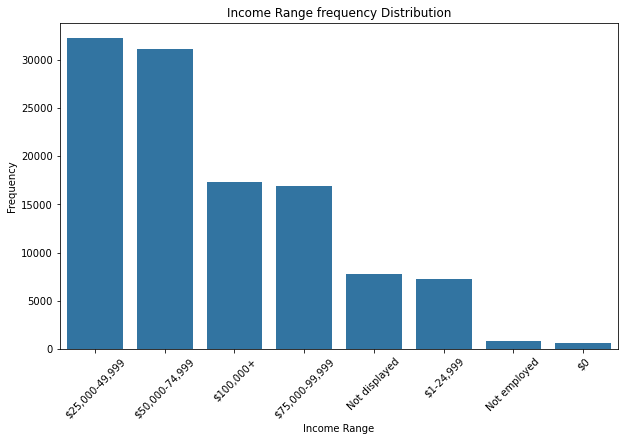

In [133]:
# check income range

plt.figure(figsize=[10, 6]);
sb.countplot(data = df, x = 'IncomeRange', color = base_color);
plt.title('Income Range frequency Distribution');
plt.ylabel('Frequency');
plt.xlabel('Income Range');
plt.xticks(rotation=45);

Most of the Borrowers has income range in 25K to 75K , we can ignore not employed and $0 borrowers as it seems wrong data. Further will check income range and loan status plots

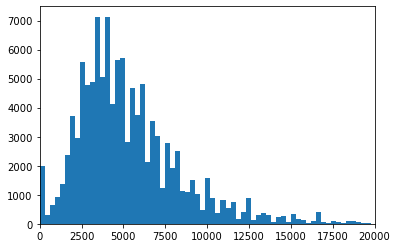

In [164]:

# Distribution of stated monthly income
bins_smi = np.arange(0, 20000, 300)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=bins_smi)
plt.xlim(0,20000);

The plot above shows the mpnthly income for most of the borrowers lies in the range of 2.5k to 5k and peak is near 5k

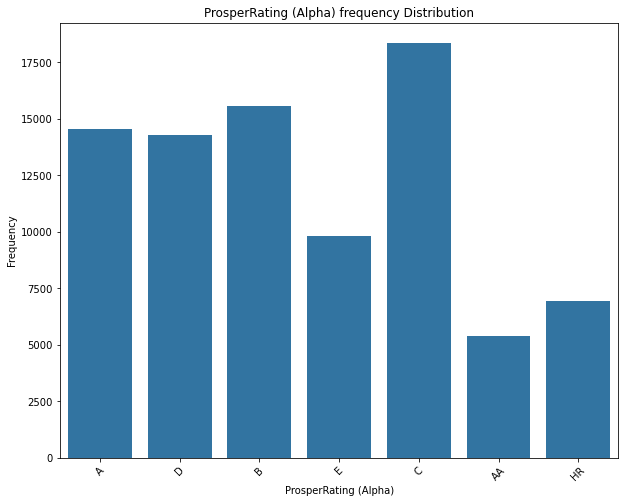

In [135]:
#Creditgrade

plt.figure(figsize=[10,8])

sb.countplot(data = df, x = 'ProsperRating (Alpha)', color = base_color);
plt.title('ProsperRating (Alpha) frequency Distribution');
plt.ylabel('Frequency');
plt.xlabel('ProsperRating (Alpha)');
plt.xticks(rotation=45);

Peak is at 17.5K (plus upto 18K ) for C rating borrowers , for A, B, D peak is almost similar with slight high in B.

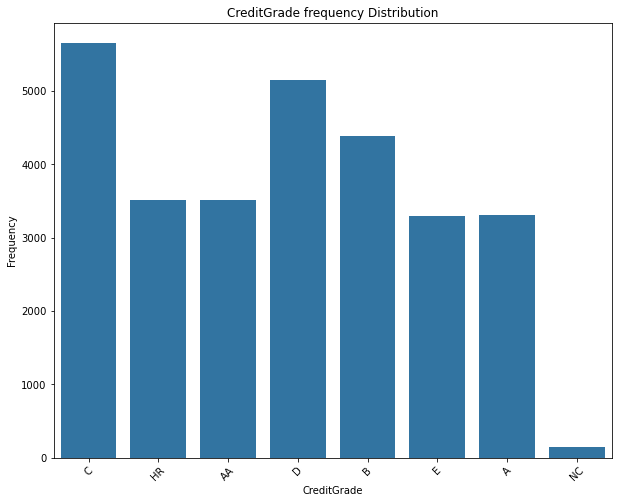

In [136]:
#prosper rating ALpha

plt.figure(figsize=[10,8])

sb.countplot(data = df, x = 'CreditGrade', color = base_color);
plt.title('CreditGrade frequency Distribution');
plt.ylabel('Frequency');
plt.xlabel('CreditGrade');
plt.xticks(rotation=45);

Most of the frequency peaks are in C, B, D range and for A,E,HR,AA shows all are in 3K to 3.5K range

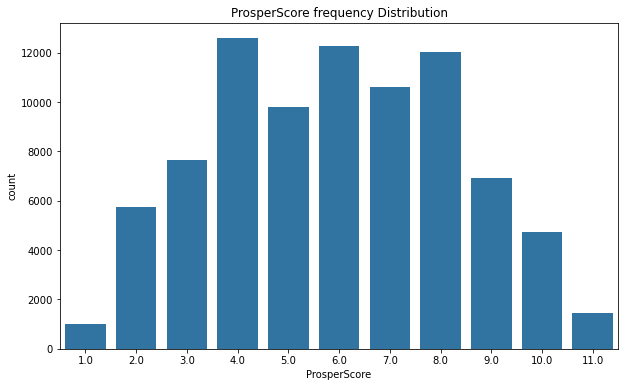

In [137]:
#prosperscore


plt.figure(figsize=[10, 6]);
sb.countplot(data = df, x = 'ProsperScore', color = base_color);
plt.title('ProsperScore frequency Distribution');

Borrowers with Prosper score 4 , 6 and 8 have more distribution share, now analysing their loan status will be intresting

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> After initial univariate plots i observed following points:-

>1)Borrower APR and interest rates both fall in between 0.05 to 0.35 mostly with peak at 0.3 

>2)Here most of the borrower's seems to be having low DebtToIncome ratio below 43% , with a peak at 0.2 , need to check people with loan and having DebtToIncome ratio above 0.43 which is unusual

>3)It seems good to see very few applications are in hold means past due and cancelled state, current and completed applications other factors of borrowers need to be investigated and very importantly what kind of borrowers became defaulters or bank Chargedoff their loan will also need to be analyzed. 

>4)Now lastly after observing all plots need to check their dependence like checking relation between loan status completed and current and income range and employment status and statedmonthly income 5)Prosper score and creditgrade relation seems to be analyzed with Borrower APR and interest rate

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Most of the loan amount availed is in the range upto 10K with peak at 5k whereas stated monthly income seems to be in millions or 17500 etc which is not sensible so need to filter this data as well in further analysis and visualisations wherever required

## Bivariate Exploration <a class="anchor" id="bi"></a>

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

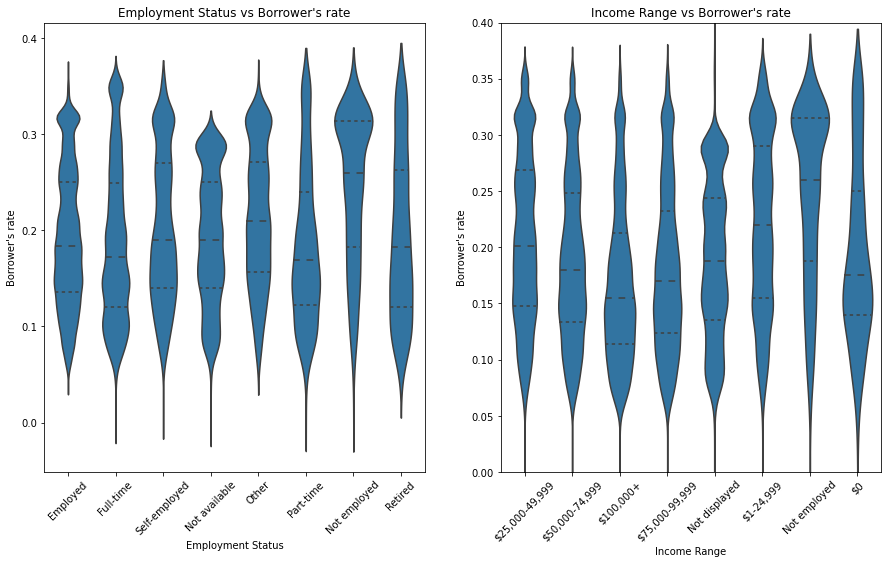

In [242]:

# bivariate plots of total BorrowerRate (and BorrowerAPR as well bcoz same graphs will be there) 
#vs employment status and income range

plt.figure(figsize=[15, 8.27]);
colorChoice = sb.color_palette()[0]

plt.subplot(1,2,1)
sb.violinplot(data = df, x = 'EmploymentStatus', y = 'BorrowerRate', color=colorChoice , inner='quartile');
plt.title('Employment Status vs Borrower\'s rate');
plt.ylabel('Borrower\'s rate');
plt.xlabel('Employment Status');
plt.xticks(rotation=45);

plt.subplot(1,2,2)

sb.violinplot(data = df, x = 'IncomeRange', y = 'BorrowerRate', color=colorChoice , inner='quartile');
plt.title('Income Range vs Borrower\'s rate');
plt.ylabel('Borrower\'s rate');
plt.xlabel('Income Range');
plt.xticks(rotation=45);
plt.ylim(0,0.4);

Both above violing plots and their quartiles with median shows that for not employed borrowers the interest rate and APR is high almost 3.5% or 0.35
Hence , this point partially answer's our 2nd and 3rd question regardiong factors affecting BorrowerRate and APR.
Now need to check more points affecting Borrower's rate and APR


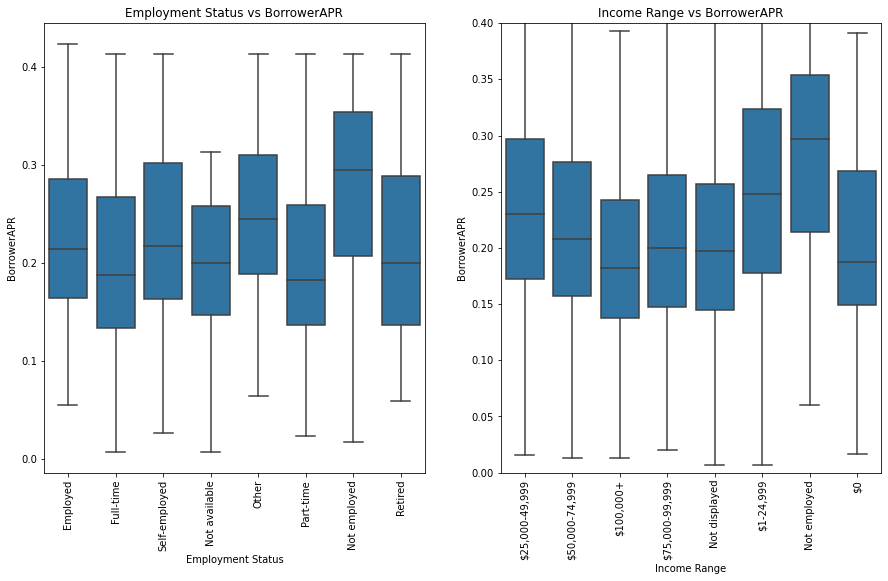

In [276]:
plt.figure(figsize=[15, 8.27]);

plt.subplot(1,2,1)
sb.boxplot(data = df, x = 'EmploymentStatus', y = 'BorrowerAPR', color=base_color );
plt.title('Employment Status vs BorrowerAPR');
plt.ylabel('BorrowerAPR');
plt.xlabel('Employment Status');
plt.xticks(rotation=90);

plt.subplot(1,2,2)

sb.boxplot(data = df, x = 'IncomeRange', y = 'BorrowerAPR', color=base_color );
plt.title('Income Range vs BorrowerAPR');
plt.ylabel('BorrowerAPR');
plt.xlabel('Income Range');
plt.xticks(rotation=90);
plt.ylim(0,0.4);

Box plots above shows same thing like BorrowerRate Violin plots but one relationship getting even clearer here that for income range below 25K has APR higher as compared to other higher income range borrowers

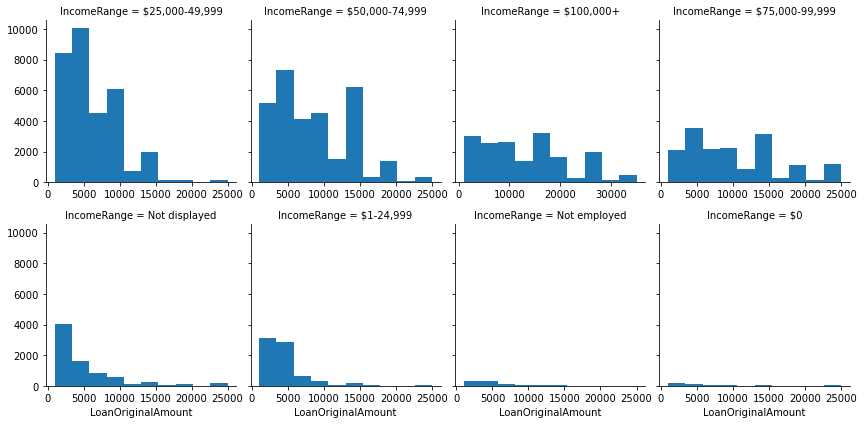

In [244]:
g = sb.FacetGrid(data = df, col = 'IncomeRange',  col_wrap = 4 , sharex=False)
g.map(plt.hist, "LoanOriginalAmount");

Text(0.5, 0, 'IncomeRange')

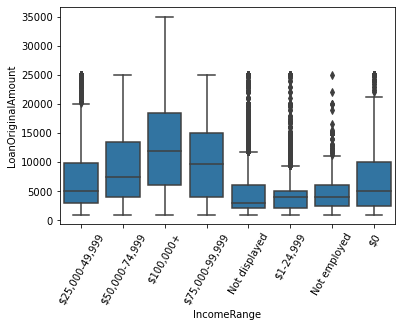

In [183]:
sb.boxplot(data=df, x='IncomeRange', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation=60);
plt.xlabel('IncomeRange')

Most of the borrowers in the IncomeRange $100000 has loan amount from 7k to 15k aprox

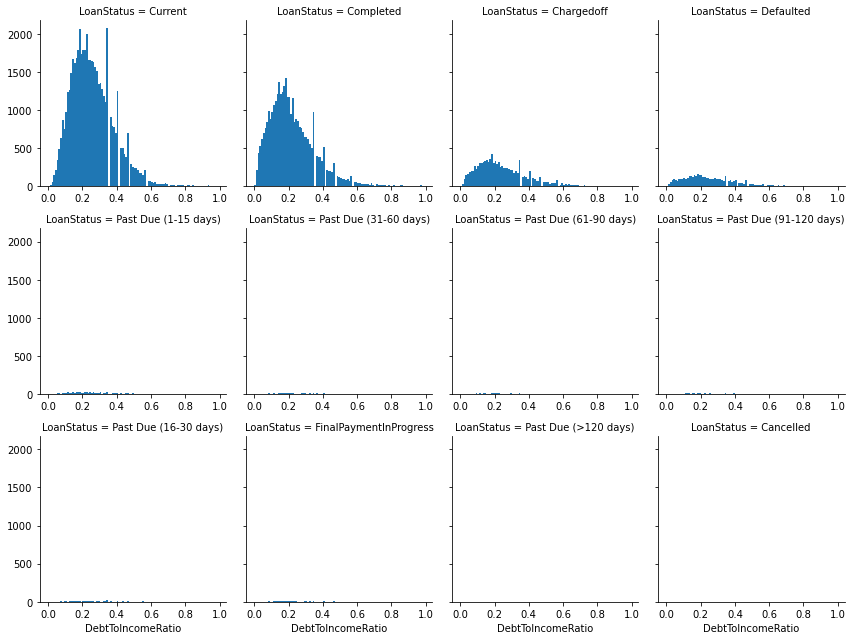

In [232]:
bin_edges = np.arange(0, 1, 0.01)

g = sb.FacetGrid(data = df, col = 'LoanStatus', col_wrap = 4, sharex=False)
g.map(plt.hist, "DebtToIncomeRatio",bins = bin_edges , );


Most of the Borrowers with LoanStatus Completed , Current and ChargeOff has debt to income ratio common 0.2 , so definitely some other factors are involved in loan status decision factor which we will investigate further.

In [370]:
# replace NC with HR
df['CreditGrade'].replace(['NC', 'HR'], 'E', inplace = True)

# fill NA with empty strings
df['ProsperRating (Alpha)'].fillna("", inplace = True)
df['CreditGrade'].fillna("", inplace = True)

# combine credit ratings
df['ProsperRatingCombined'] = df['ProsperRating (Alpha)'] + df['CreditGrade']

# drop rows with no credit ratings
df = df.query(' ProsperRatingCombined != ""')

# check values
df['ProsperRatingCombined'].value_counts()

/Users/UjwalaKale/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/Users/UjwalaKale/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-370-88121205da25>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

C     23994
B     19970
D     19427
A     17866
E     16733
AA     8881
HR     6935
Name: ProsperRatingCombined, dtype: int64

In [371]:

num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']
cat_vars = ['Term', 'ProsperRatingCombined', 'EmploymentStatus']

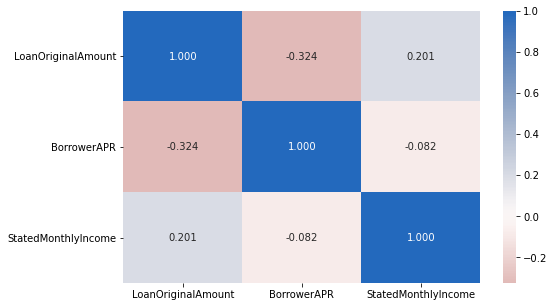

In [372]:

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

This correlation plot clearly shows that LoanOriginalAmount and BorrowerAPR has negative correlation with low  value which of 0.323 shows their weak negative relationship and StatedMonthlyIncome also has weak but positive correlation.
That means even for higher loan amount BorrowerAPR seems to be somewhat less or same.

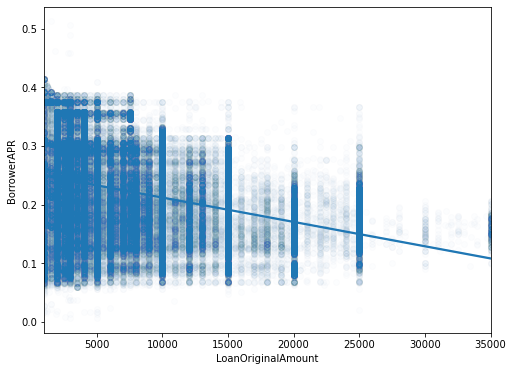

In [272]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});

This plot again shows the same observation as of above correlation map that range of APR decrease with the increase of loan amount. Overall, the borrower APR is negatively correlated with loan amount.

/Users/UjwalaKale/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
/Users/UjwalaKale/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/UjwalaKale/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/UjwalaKale/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pas

<Figure size 720x720 with 0 Axes>

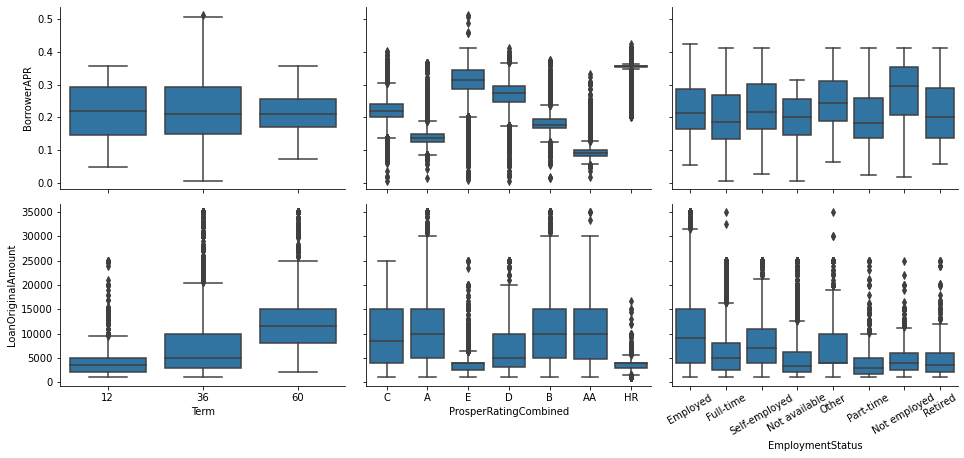

In [373]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    sb.boxplot(x, y, color = base_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df, y_vars = ['BorrowerAPR', 'LoanOriginalAmount'], 
                x_vars = cat_vars, size = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);

This plot many things , we will write them one by one:-

1)Employmentstatus with Employment definitely has LoanAmount sactioned more as per box plot quartiles , however BorrowerRate seems almost same for all employtment statuses.

2)Borrowers with better rating also have higher loan amount. 

3)For higher Loan Amounts , term is also high.

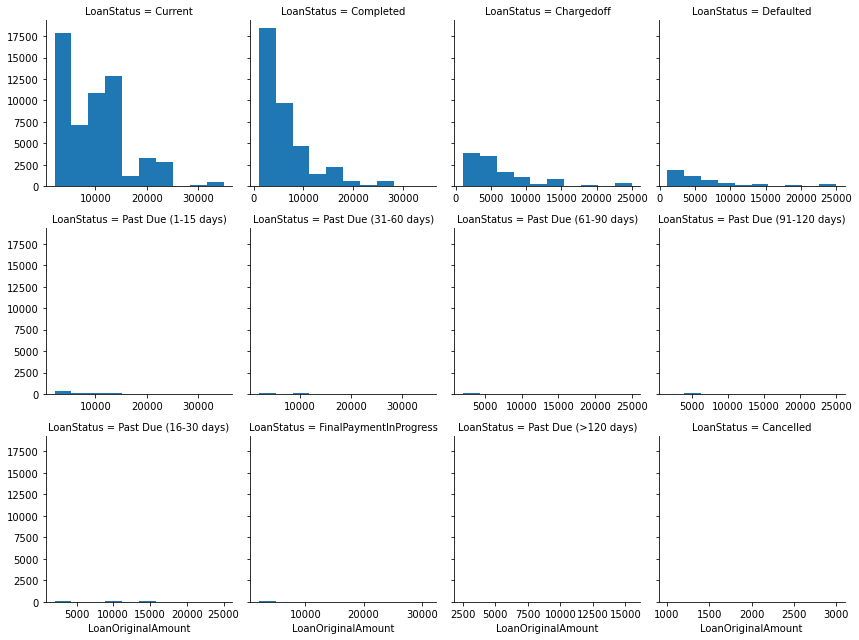

In [343]:
g = sb.FacetGrid(data = df, col = 'LoanStatus',  sharex=False , col_wrap=4)
g.map(plt.hist, "LoanOriginalAmount");

For all the lower Loan Amounts upto 15K , Loan Status shows completed and Current. 

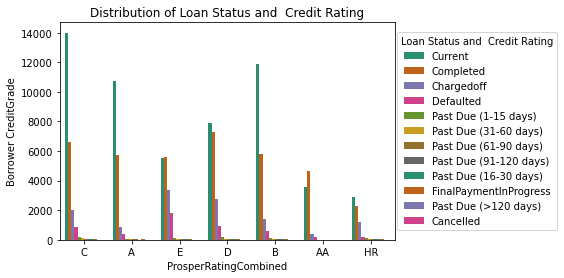

In [374]:
# clustered bar chart
ax = sb.countplot(data = df, x = 'ProsperRatingCombined', hue = 'LoanStatus',
                   palette = 'Dark2')

ax.legend(title = 'Loan Status and  Credit Rating' ,loc='center right' , bbox_to_anchor=(1.50, 0.5), ncol=1)
plt.title('Distribution of Loan Status and  Credit Rating')
plt.ylabel('Borrower CreditGrade');

Most of the Borrowers with B and C Prosper and Credit ratings has Current and Completed Loan Status

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>1)Not employed borrowers the interest rate and APR is high almost 3.5% or 0.35 

2)For income range below 25K has APR higher as compared to other higher income range borrowers

3)Most of the borrowers in the IncomeRange dollar 100000 has loan amount from 7k to 15k aprox

4)Most of the Borrowers with LoanStatus Completed , Current and ChargeOff has debt to income ratio common 0.2 , so definitely some other factors are involved in loan status decision factor which we will investigate further.

5)This correlation plot clearly shows that LoanOriginalAmount and BorrowerAPR has negative correlation with low  value which of 0.323 shows their weak negative relationship hence even for higher loan amount BorrowerAPR seems to be somewhat less or same.

6)For all the lower Loan Amounts upto 15K , Loan Status shows completed and Current.

7)Most of the Borrowers with B and C Prosper and Credit ratings has Current and Completed Loan Status

8)Employmentstatus -  ‘Employment ‘   has most of the LoanAmount sanctioned as per box plot quartiles , however BorrowerRate seems almost same for all the categories of mploymentstatus .

9)And Borrowers with better rating also have higher loan amount.

10)For higher Loan Amounts , term is also high.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most of the Borrowers with LoanStatus Completed , Current ,i we will investigate further with in multivariate plots in addition to currently observed plots

## Multivariate Exploration <a class="anchor" id="multi"></a>

The main thing I want to explore in this part of the analysis is how the categorical variable (Prosper rating and term) play into the relationship between borrower APR and loan original amount.

I will further investigate Loan Status and EmploymentStatus, IncomeRange categories.

Also i want to analyse EstimatedLoss and EstimatedReturn relationship with LoanAmount , LoanStatus and mainly BorrowerAPR.


In [336]:
#simplifying incomerange column

df['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

/Users/UjwalaKale/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


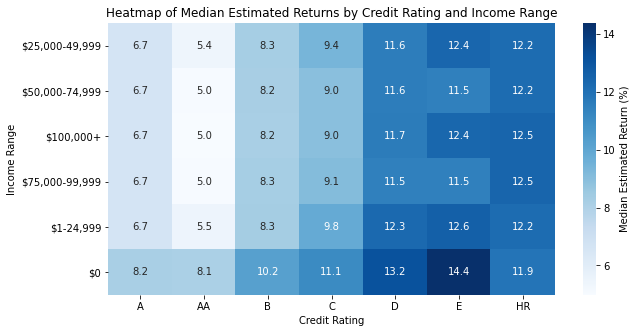

In [392]:
plt.figure(figsize = [10,5])

cat_med = df.groupby(['ProsperRatingCombined', 'IncomeRange']).median()['EstimatedReturn']*100
cat_med = cat_med.reset_index(name = 'EstimatedReturnMedian')
cat_med = cat_med.pivot(index = 'IncomeRange', columns = 'ProsperRatingCombined', values = 'EstimatedReturnMedian')

sb.heatmap(cat_med, annot = True, fmt = '.1f', cmap = "Blues", cbar_kws = {'label' : 'Median Estimated Return (%)'})
plt.xlabel('Credit Rating')
plt.ylabel('Income Range')
plt.title('Heatmap of Median Estimated Returns by Credit Rating and Income Range');

From the heat map we can see that for lower credit ratings, and lower incomes we have higher estimated returns. However income range is not influencing the estimated returns by credit rating category.

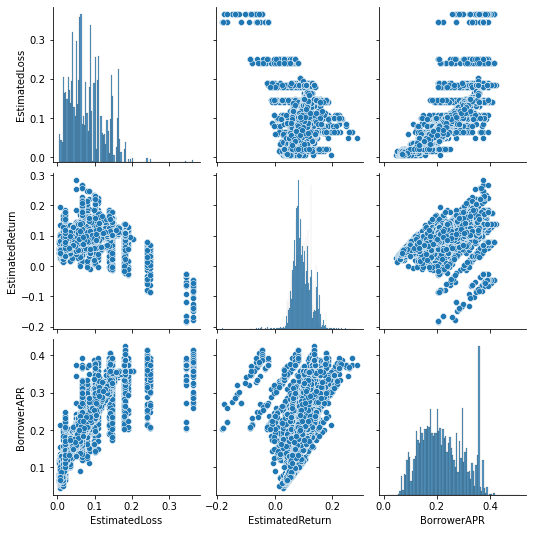

In [359]:
sb.pairplot(df[['EstimatedLoss', 'EstimatedReturn', 'BorrowerAPR']]);


Its clear from the plots above that BorrowerAPR has positive relationship with EstimatedLoss and EstimatedReturn , BorrowerAPR increases with both of them.

/Users/UjwalaKale/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


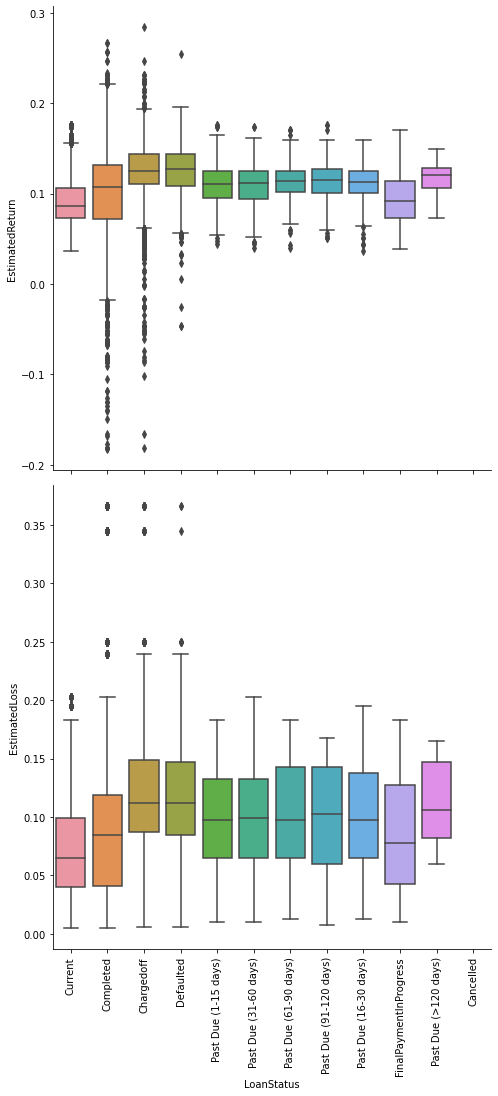

In [391]:

g = sb.PairGrid(data = df, y_vars = ['EstimatedReturn', 'EstimatedLoss'],
                x_vars = ['LoanStatus'] , size=7)
g.map(sb.boxplot);
plt.xticks(rotation=90);

From above Box plots ,we can observe that ChargedOff and Defaulted Loan Statuses Borrowers have higher EstimatedLoss and EstimatedReturn percentage

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Below are this exploration findings:-
1)From the heat map we can see that for lower credit ratings, and lower incomes we have higher estimated returns.

>2)However income range is not influencing the estimated returns by credit rating category.

>3)From the plots it showed that BorrowerAPR has positive relationship with EstimatedLoss and EstimatedReturn , BorrowerAPR increases with both of them.

>4)From above Box plots ,we can observe that ChargedOff and Defaulted Loan Statuses Borrowers have higher EstimatedLoss and EstimatedReturn percentage

### Were there any interesting or surprising interactions between features?

> Yes, i found it quite intresting that income range is not influencing the estimated returns by credit rating category.